# L data
https://deepvision.lpoint.com/app/deepVision/BPPA100100.do?mCode=M104&smCode=01

A : 백화점 / B : 마트 / C : 슈퍼 / D : 롭스

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

plt.rcParams["font.family"] = 'NanumBarunGothic'

['sans-serif']
10.0


## 경쟁사이용.txt

In [3]:
data1 = pd.read_csv('ldata/경쟁사이용.txt',encoding='CP949')
data1.head()

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28159 entries, 0 to 28158
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객번호    28159 non-null  int64 
 1   제휴사     28159 non-null  object
 2   경쟁사     28159 non-null  object
 3   이용년월    28159 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 880.1+ KB


In [5]:
print(data1['제휴사'].unique(), '\n')
print(data1['경쟁사'].unique(), '\n')
print(data1['제휴사'].value_counts())

# A,B,D는 경쟁사 2곳, C는 경쟁사 3곳
# B -> A -> C -> D 순으로 경쟁사 이용이 많음.

['D' 'A' 'B' 'C'] 

['D02' 'D01' 'A01' 'A02' 'B01' 'C03' 'B02' 'C02' 'C01'] 

B    13526
A     6385
C     5176
D     3072
Name: 제휴사, dtype: int64


## 고객DEMO.txt

In [6]:
data2 = pd.read_csv('ldata/고객DEMO.txt',encoding='CP949')
data2 = pd.DataFrame(data2)
data2.head(3)

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    19383 non-null  int64  
 1   성별      19383 non-null  object 
 2   연령대     19383 non-null  object 
 3   거주지역    19205 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 605.8+ KB


In [8]:
data2.isnull().sum()

# 거주지역을 모르는 고객 : 178명

고객번호      0
성별        0
연령대       0
거주지역    178
dtype: int64

In [9]:
print(data2['고객번호'].nunique(),'\n')
print(data2['연령대'].unique(),'\n')
print(data2['거주지역'].unique())

# 고객번호 중복 x. 연령대는 5살 범위로 범주화되어있음.
# 거주지역의 숫자 = 거주지역 신우편번호 앞 3자리

19383 

['60세이상' '55세~59세' '50세~54세' '45세~49세' '40세~44세' '35세~39세' '30세~34세'
 '25세~29세' '20세~24세' '19세이하'] 

[ 60. 100.  33.  16. 240.  36.  10.  24.  43. 210. 460.  55.  nan  47.
  39. 440.  87.  65.  13.  49. 360.  69. 410. 340. 500.  72. 610.  45.
  75.  82.  30.  79.  27.  52. 270. 540. 310.  20. 570. 300.  85. 630.]


성별
F    15898
M     3485
dtype: int64


<AxesSubplot:xlabel='성별', ylabel='count'>

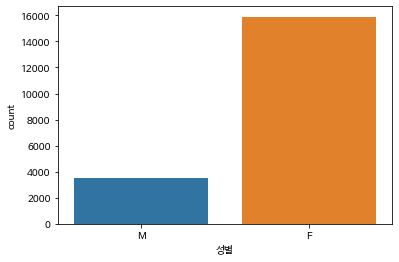

In [10]:
print(data2.groupby('성별').size())
sns.countplot(data=data2, x=data2['성별'])

# 여성은 15898명, 남성은 3485명으로 여성회원수가 남성회원수에 비해 4.5배 많음.

연령대 별 고객수 :  45세~49세    4082
40세~44세    3677
50세~54세    3114
35세~39세    2769
55세~59세    1774
30세~34세    1679
60세이상      1303
25세~29세     685
20세~24세     283
19세이하        17
Name: 연령대, dtype: int64


<AxesSubplot:xlabel='연령대', ylabel='count'>

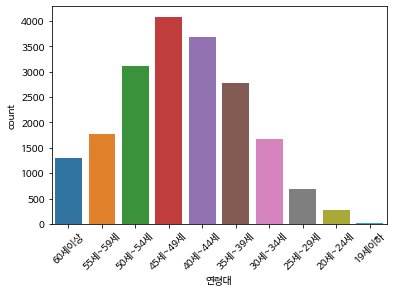

In [11]:
print('연령대 별 고객수 : ', data2['연령대'].value_counts())
plt.xticks(rotation = 45 )
sns.countplot(data=data2, x=data2['연령대'])

# 40~44세 연령대의 고객수가 가장 많음. 
# 각 연령대별의 차이는 많이 없지만 미성년자 고객수가 현저히 적음.

In [12]:
data2_g = data2.groupby(['성별','연령대']).count()
data2_g = data2_g.drop(['거주지역'], axis=1)
data2_g.rename(columns = {'고객번호' : '고객 수'}, inplace = True)
data2_g = data2_g.sort_values(by='고객 수', ascending=False)
data2_g

고객 수
성별 연령대          
F  45세~49세  3465
   40세~44세  2996
   50세~54세  2636
   35세~39세  2171
   55세~59세  1490
   30세~34세  1283
   60세이상    1054
M  40세~44세   681
   45세~49세   617
   35세~39세   598
F  25세~29세   542
M  50세~54세   478
   30세~34세   396
   55세~59세   284
F  20세~24세   250
M  60세이상     249
   25세~29세   143
   20세~24세    33
F  19세이하      11
M  19세이하       6

In [13]:
data2_g = data2.groupby(['성별','연령대']).count()
data2_g = data2_g.drop(['거주지역'], axis=1)
data2_g.rename(columns = {'고객번호' : '고객 수'}, inplace = True)
data2_g

고객 수
성별 연령대          
F  19세이하      11
   20세~24세   250
   25세~29세   542
   30세~34세  1283
   35세~39세  2171
   40세~44세  2996
   45세~49세  3465
   50세~54세  2636
   55세~59세  1490
   60세이상    1054
M  19세이하       6
   20세~24세    33
   25세~29세   143
   30세~34세   396
   35세~39세   598
   40세~44세   681
   45세~49세   617
   50세~54세   478
   55세~59세   284
   60세이상     249

In [14]:
data2_1 = data2.set_index('성별')
data2_1 = data2_1.drop(['고객번호','거주지역'],axis=1)
data2_1 = data2_1['연령대'].value_counts()
data2_1

45세~49세    4082
40세~44세    3677
50세~54세    3114
35세~39세    2769
55세~59세    1774
30세~34세    1679
60세이상      1303
25세~29세     685
20세~24세     283
19세이하        17
Name: 연령대, dtype: int64

고객 거주지역 빈도수 :  100.0    5993
460.0    1922
55.0     1431
210.0    1071
500.0     860
16.0      819
610.0     639
60.0      603
540.0     568
340.0     346
24.0      339
360.0     339
270.0     338
49.0      329
410.0     321
570.0     294
47.0      278
310.0     234
13.0      220
440.0     217
10.0      185
240.0     177
75.0      175
27.0      146
36.0      139
39.0      119
65.0      114
43.0      109
72.0      109
33.0       96
87.0       95
69.0       94
52.0       88
20.0       76
82.0       68
30.0       66
45.0       54
79.0       48
85.0       41
300.0      32
630.0      13
Name: 거주지역, dtype: int64


<AxesSubplot:xlabel='거주지역', ylabel='count'>

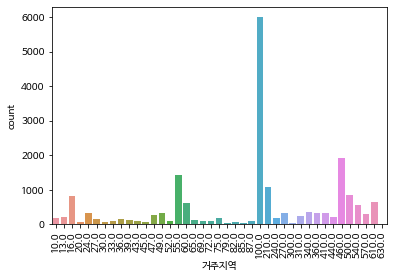

In [15]:
print('고객 거주지역 빈도수 : ', data2['거주지역'].value_counts())
y=data2['거주지역'].value_counts()
plt.xticks(rotation = 90 )
sns.countplot(data=data2, x=data2['거주지역'])

# 고객이 많은 지역과 적은 지역 분석가능.
# 각 거주지역 번호가 나타내는 지역이 어디인지.

## 구매상품TR.txt

In [16]:
data3 = pd.read_csv('ldata/구매상품TR.txt',encoding='CP949')
data3.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28593030 entries, 0 to 28593029
Data columns (total 10 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   제휴사     object
 1   영수증번호   int64 
 2   대분류코드   int64 
 3   중분류코드   int64 
 4   소분류코드   object
 5   고객번호    int64 
 6   점포코드    int64 
 7   구매일자    int64 
 8   구매시간    int64 
 9   구매금액    int64 
dtypes: int64(8), object(2)
memory usage: 2.1+ GB


In [18]:
# 구매일자의 형식 변환(int -> datetime)

data3['구매일자'] = data3['구매일자'].astype(str)
data3['구매일자'] = pd.to_datetime(data3['구매일자'])
# data3['구매일자'] = data3['구매일자'].dt.tz_localize('UTC')
# data3['구매일자'] = data3['구매일자'].dt.year # 연도만 출력
data3.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,2014-02-22,20,2420
1,B,8664000,16,1601,B160101,17218,44,2014-02-22,20,1070
2,B,8664000,16,1602,B160201,17218,44,2014-02-22,20,8060
3,B,8664000,18,1803,B180301,17218,44,2014-02-22,20,6000
4,B,8664001,5,509,B050901,17674,44,2014-02-22,22,1120


In [96]:
# 14, 15년도별로 데이터 분류

y3_14 = data3[data3.구매일자 == '2014']
y3_15 = data3[data3.구매일자 == '2015']

In [98]:
print('14년도 총 구매금액 :', y3_14['구매금액'].sum(),'원')
print('15년도 총 구매금액 :', y3_15['구매금액'].sum(),'원')

# 전년도 대비 3천만원가량 증가.(약 12% 증가)

14년도 총 구매금액 : 226382544 원
15년도 총 구매금액 : 254806890 원


## 멤버십여부.txt

In [43]:
data4 = pd.read_csv('ldata/멤버십여부.txt',encoding='CP949')
data4.head()

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411


In [44]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객번호    7456 non-null   int64 
 1   멤버십명    7456 non-null   object
 2   가입년월    7456 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 174.9+ KB


In [45]:
print(data4['멤버십명'].unique(), '\n')
print(data4['멤버십명'].value_counts())

# 멤버십은 하이마트, 다둥이, 롭스, 더영 총 4종류.
# 하이마트 -> 다둥이 -> 더영 -> 롭스 순으로 고객수가 많음.

['하이마트' '다둥이' '롭스' '더영'] 

하이마트    4418
다둥이     2009
더영       642
롭스       387
Name: 멤버십명, dtype: int64


In [46]:
# 가입년월의 형식 변환(int -> str)

data4['가입년월'] = data4['가입년월'].astype(str)

In [94]:
data4.sort_values(by=['가입년월'], axis=0)

,고객번호,멤버십명,가입년월
5632,14781,더영,201210
7008,18264,더영,201210
2666,8656,더영,201210
2882,9001,더영,201210
4892,13071,더영,201211
...,...,...,...
7112,18504,더영,201512
4776,12833,더영,201512
4766,12804,하이마트,201512
5514,14493,하이마트,201512


In [95]:
y4_12 = data4[data4['가입년월'].str.contains('2012')]
y4_13 = data4[data4['가입년월'].str.contains('2013')]
y4_14 = data4[data4['가입년월'].str.contains('2014')]
y4_15 = data4[data4['가입년월'].str.contains('2015')]
print('12년도 가입고객수 :', y4_12['고객번호'].nunique(),'명')
print('13년도 가입고객수 :', y4_13['고객번호'].nunique(),'명')
print('14년도 가입고객수 :', y4_14['고객번호'].nunique(),'명')
print('15년도 가입고객수 :', y4_15['고객번호'].nunique(),'명')

# 13년도에 크게 증가. 13년 -> 14년에 전년도 대비 25% 증가
# 14,15년도의 멤버십 가입고객수의 차이는 많지 않음.

12년도 가입고객수 : 6 명
13년도 가입고객수 : 2097 명
14년도 가입고객수 : 2578 명
15년도 가입고객수 : 2439 명


## 상품분류.txt

In [24]:
data5 = pd.read_csv('ldata/상품분류.txt',encoding='CP949')
data5.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품


In [70]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제휴사     4386 non-null   object
 1   대분류코드   4386 non-null   int64 
 2   중분류코드   4386 non-null   int64 
 3   소분류코드   4386 non-null   object
 4   중분류명    4386 non-null   object
 5   소분류명    4386 non-null   object
dtypes: int64(2), object(4)
memory usage: 205.7+ KB


In [80]:
print('● 대분류코드 종류와 갯수 : \n', data5['대분류코드'].unique(), '\n', data5['대분류코드'].nunique())
print('● 중분류코드 갯수 : \n', data5['중분류코드'].nunique())
print('● 소분류코드 갯수 : \n', data5['소분류코드'].nunique())

● 대분류코드 종류와 갯수 : 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92] 
 92
● 중분류코드 갯수 : 
 656
● 소분류코드 갯수 : 
 4386


In [81]:
print('● 중분류명 종류와 갯수 : \n', data5['중분류명'].unique(), '\n', data5['중분류명'].nunique())

● 중분류명 종류와 갯수 : 
 ['일용잡화' '육류' '축산가공' '농산물' '수산품' '가공식품' '젓갈/반찬' '건강식품' '주류' '차/커피' '기타'
 '섬유잡화' '액세서리' '화장품' '보석' '준보석/시계' '피혁잡화' '구두' '아동' '캐주얼' '커리어' '트래디셔널'
 '시티웨어' '란제리/내의' '블라우스' '기타의류' '디자이너' '모피/피혁' '남성정장' '남성캐주얼' '교복' '셔츠'
 '남성 트랜디' '스포츠' '골프용품' '대형가전' '소형가전' '통신/컴퓨터' '악기' '전자/전기' '주방가전' '명품'
 '주방용품' '문구/팬시' '생활잡화' '식기' '가구' '침구/수예' '웨딩' '열매채소' '버섯' '온라인버섯/열매채소'
 '조리반찬' '시즌반찬' '포장젓갈' '포장반찬' '양곡' '잡곡류' '즉석도정미' '가공양곡' '잎채소' '뿌리채소' '버섯류'
 '샐러드채소' '약초' '양념류' '식자재' '친환경채소' '김치채소' '온라인잎/샐러드채소' 'LOCAL잎채소'
 'LOCAL김치채소' '샐러드/간편채소' '대중선어' '냉동수산물' '생선선물세트' '고등어/삼치' '대구' '도미/민어'
 '기타구색생선' '꽁치/가자미' '오징어' '조기/명태' '국산게/갈치' '선물세트' '즉석구이안주' '마른안주' '멸치건명태'
 '해조류' '특산물' '건오징어' '조미오징어' '육포' '쥐치포' '마른안주선물세트' 'Fast Food' '편의시설'
 '레스토랑' '카페' '판매시설' '주유소' '브랜드조리' '베이커리' '구이' '튀김' '밥류' '구이찜조리' '반찬류'
 '대용식' '이벤트조리' '간식조리' '간편조리' '튀김조리' '피자' '냉장음료' '데일리처분' '흰우유' '가공우유'
 '요구르트' '유제품' '브랜드빵' '치즈' '디저트' '유가공' '조미료' '소스류' '장류' '식용유지' '조미선물세트'
 '가루' '향신료' '액상조미료' '복합조미료' '소금/설탕류' '수입조미' '간편조리식품' '라면' '면류' '분

In [82]:
print('● 소분류명 종류와 갯수 : \n', data5['소분류명'].unique(), '\n', data5['소분류명'].nunique())

● 소분류명 종류와 갯수 : 
 ['위생세제' '휴지류' '뷰티상품' ... '아이브로우' '아이섀도우' '메이크업세트'] 
 3520


In [83]:
print(data5['중분류명'].value_counts())

# 스포츠, 주방용품, 문화용품, 캐주얼, 전자용품 순으로 많은 비율을 차지함.

스포츠      79
주방용품     72
문화용품     65
캐주얼      59
전기전자     57
         ..
여성베이직     1
전자학습기     1
주유소       1
여성        1
차선물세트     1
Name: 중분류명, Length: 717, dtype: int64


In [84]:
print(data5['소분류명'].value_counts())

# 소분류는 종류와 그 분포가 매우 다양해서 분석에 무의미 할 것 같음.

브랜드          8
건전지          6
기타           6
초밥           6
유아용품         6
            ..
국물팩          1
마담/어덜트아우터    1
세이브더칠드런      1
남성세미드레스화     1
기타건강측정용품     1
Name: 소분류명, Length: 3520, dtype: int64


In [106]:
print(data5['제휴사'][data5['제휴사'] == 'A'].count())
print(data5['제휴사'][data5['제휴사'] == 'B'].count())
print(data5['제휴사'][data5['제휴사'] == 'C'].count())
print(data5['제휴사'][data5['제휴사'] == 'D'].count())

# 상품 갯수는 B > C > A > D 제휴사 순으로 많음.
# 그렇다면 매출액도 그런지?

630
2624
987
145


In [110]:
print(data3['구매금액'][data3['제휴사']=='A'].sum())
print(data3['구매금액'][data3['제휴사']=='B'].sum())
print(data3['구매금액'][data3['제휴사']=='C'].sum())
print(data3['구매금액'][data3['제휴사']=='D'].sum())

# 상품갯수는 B가 다른 제휴사보다 많지만
# A 제휴사가 백화점이고, 판매되는 상품의 가격대가 상대적으로 높아서
# 구매금액의 총합은 A 제휴사, 즉 롯데백화점이 가장 많음.

514841144030
111221686478
50060970889
895355544


## 채널이용.txt

In [25]:
data6 = pd.read_csv('ldata/채널이용.txt',encoding='CP949')
data6.head()

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30


In [26]:
print(data6['제휴사'].unique(), '\n')
# A,D는 모바일/앱만 있으며, B,C는 모바일/앱과 온라인몰 둘 다 있음.

print(data6['이용횟수'].max())
print(data6['이용횟수'].min())
# 채널을 가장 많이 이용한 고객은 240번까지 사용함.(3개월간 데이터)

['A_MOBILE/APP' 'B_MOBILE/APP' 'C_MOBILE/APP' 'D_MOBILE/APP'
 'B_ONLINEMALL' 'C_ONLINEMALL'] 

240
1


## 데이터 합치기
- data1 : 경쟁사이용
- data2 : 고객DEMO
- data3 : 구매상품TR
- data4 : 멤버십여부
- data5 : 상품분류
- data6 : 채널이용

In [27]:
print('data1 고객번호 갯수 :', data1['고객번호'].nunique())
print('data2 고객번호 갯수 :', data2['고객번호'].nunique())
print('data3 고객번호 갯수 :', data3['고객번호'].nunique())
print('data4 고객번호 갯수 :', data4['고객번호'].nunique())
print('data6 고객번호 갯수 :', data6['고객번호'].nunique())

# 고객의 고유 식별갯수인 고객번호 갯수가 같지않음.
# data2와 data3은 고객번호 기준으로 합치기 가능할 것 같음.

data1 고객번호 갯수 : 5881
data2 고객번호 갯수 : 19383
data3 고객번호 갯수 : 19383
data4 고객번호 갯수 : 6498
data6 고객번호 갯수 : 6766


In [28]:
print('data2 고객번호 고유값 : \n', data2['고객번호'].sort_values())
print('data3 고객번호 고유값 : \n', data3['고객번호'].sort_values())

# 고객번호의 갯수는 같지만 고유값이 같지않기때문에 데이터 합치기 불가능 할 듯.

data2 고객번호 고유값 : 
 0            1
1            2
2            3
3            4
4            5
         ...  
19378    19379
19379    19380
19380    19381
19381    19382
19382    19383
Name: 고객번호, Length: 19383, dtype: int64
data3 고객번호 고유값 : 
 10596476        1
18644938        1
18644941        1
18644942        1
18644943        1
            ...  
64943       19383
64945       19383
341097      19383
22514742    19383
341188      19383
Name: 고객번호, Length: 28593030, dtype: int64


- 최종적으로 고객별 맞춤 마케팅을 하기 위해서는 DesicionTreeClassifier 를 이용해야 할 것 같음.
- 최적의 하이퍼 파라미터와 모델 판별기준에는 어떤 척도를 사용할 것인지(accuracy_score)